# Propagating Monte Carlo Error: Python3
By: Nicholas Chieppa & Ben Donnieq

In [31]:
import numpy as np
import scipy.stats as spy
import scipy.integrate as inter
from matplotlib import pyplot as plt
from matplotlib import patches as pltPatch
import matplotlib

# Generate Random Data

In [3]:
xvals = np.linspace(-1, 1, 11) # Project Requirements specify 11 points on -1, 1
def makeFakeData(fn):
    return fn(xvals)+np.random.normal(size=len(xvals))

Below is the funciton that dictates solution behavior

In [4]:
fn1 = lambda x: -2+3.*x 
fn2 = lambda x: 3.

In [5]:
samples = 1000
def createDataSet(fn):
    data = []
    for index in np.arange(samples): # at least 1000 data sets
        x = makeFakeData(fn)
        data.append(np.polyfit(xvals, x, 1))
    return np.array(data), x

fn1Data = createDataSet(fn1)
fn2Data = createDataSet(fn2)
print(fn1Data)

(array([[ 3.58352443, -2.42761615],
       [ 3.45649342, -1.68201927],
       [ 3.02660594, -1.92361439],
       ...,
       [ 3.14302639, -2.49940098],
       [ 2.5173167 , -1.66805157],
       [ 2.96268816, -1.84581976]]), array([-4.52185919, -3.294533  , -2.5002394 , -4.47990983, -3.55830916,
       -2.3406068 , -2.45562155,  0.64119838,  0.33232122, -0.18141578,
        2.05495778]))


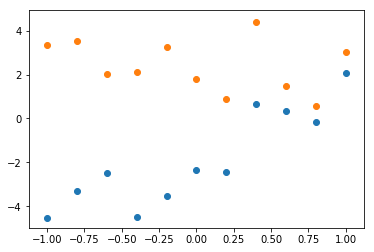

In [6]:
def scatter(data):
    plt.scatter(xvals, data)
scatter(fn1Data[1])
scatter(fn2Data[1])

# Distibution of Linear Fit Coefficients
A linear equation has the general formula f(x)= mx + b.

The first coefficient that the polyfit function generates is the estimate for b and the second coefficient is the estimate for the slope of the function m. 

This equates to C0 = b, C1 = m.

Properties of generated test data with known function: fn = -2 + 3x
Estimated function
f: -2.0 + 2.98 x
C0 = -2.0 ; C1 = 2.98
Correlation coeff: 1.0
Covariance of C0, C1 -0.000500393795788217
Variance of Ck: C0 = 0.09 ; C1 = 0.22

Properties of generated test data with known function: fn = 3
Estimated function
f: 2.99 + 0.02 x
C0 = 2.99 ; C1 = 0.02
Correlation coeff: 1.0
Covariance of C0, C1 0.00474148850898286
Variance of Ck: C0 = 0.08 ; C1 = 0.22


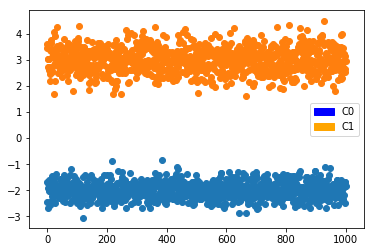

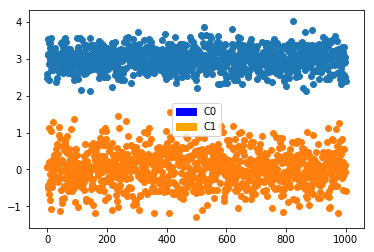

In [33]:
def printProp(data, fig):
    print("Estimated function")
    ck0 = np.round(np.mean(data[0][:,1]), 2)
    ck1 = np.round(np.mean(data[0][:,0]), 2)
    print("f:", ck0, "+", ck1, "x")
    print("C0 =", ck0, "; C1 =", ck1)
    
    ck0var = np.round(np.var(data[0][:,1]), 2)
    ck1var = np.round(np.var(data[0][:,0]), 2)
    
    plt.figure(fig)
    
    ck0_leg = pltPatch.Patch(color = 'blue', label='C0')
    ck1_leg = pltPatch.Patch(color = 'orange', label='C1')
    plt.legend(handles=[ck0_leg, ck1_leg])
    
    #r = ck1 * np.var(xvals) / np.var(data[1])
    r = np.corrcoef((ck0, ck1))
    print("Correlation coeff:", r)
    
    covar = np.round(np.cov(data[0][:,1], data[0][:,0])[0][1], 50)
    print("Covariance of C0, C1", covar)
    
    plt.scatter(list(range(samples)), data[0][:,1])
    plt.scatter(list(range(samples)), data[0][:,0])
    
    print("Variance of Ck: C0 =", ck0var, "; C1 =", ck1var)
    
    return (ck0, ck0var), (ck1, ck1var), covar, lambda x: ck0 + ck1 * x 
    
    
print("Properties of generated test data with known function: fn = -2 + 3x")
fn1prop = printProp(fn1Data, 0)
print()
print("Properties of generated test data with known function: fn = 3")
fn2prop = printProp(fn2Data, 1)

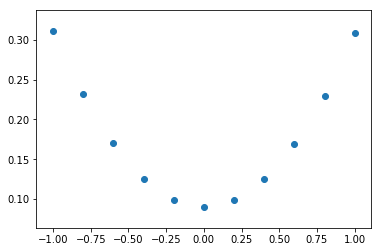

In [38]:
def varfprime(fun, x):
    return x ** 2 * fun[1][1] + fun[0][1] + 2 * (x) * fun[2]

scatter(varfprime(fn1prop, xvals))

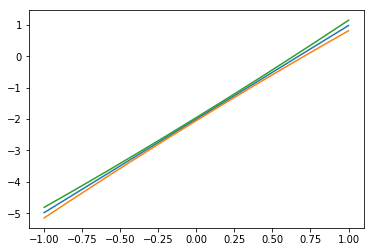

In [43]:
def plotfprime(fun, x, conf):
    plt.plot(x, fun[3](x))
    z = spy.t.ppf((1.-conf)/2., len(x))
    plt.plot(x, fun[3](x) + z * varfprime(fun, x) * len(x) ** -.5)
    plt.plot(x, fun[3](x) + -z * varfprime(fun, x) * len(x) ** -.5)
    
plotfprime(fn1prop, xvals, .90)

In [ ]:
def plotIprime(fun, x, conf):
    